In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Charge the adata
adata = sc.read_h5ad("./Data/Peng_annotated.h5ad")
adata

AnnData object with n_obs × n_vars = 49966 × 2000
    obs: 'cell_name', 'Sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'doublet', '_scvi_batch', '_scvi_labels', 'leiden', 'cell_type_prediction', 'cell_type_prediction_probability', 'per_cluster_celltype', 'per_cluster_proportion', 'Condition'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'n_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'cell_type_prediction_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'per_cluster_celltype_colors', 'um

In [4]:
obs_data = adata.obs[['Condition',"per_cluster_celltype"]]


# Obtain the T, df and number of cells 
obs_data_T = obs_data[obs_data.Condition=="T"]
counts_T = obs_data_T.groupby("per_cluster_celltype").count()

# Obtain the df and NT number of cells 
obs_data_NT = obs_data[obs_data.Condition!="T"]
counts_NT = obs_data_NT.groupby("per_cluster_celltype").count()

counts_per_celltype = counts_T+counts_NT


percent_T = counts_T/counts_T.sum()*100
percent_T = percent_T.reset_index(drop=False).rename(columns={"Condition":"Percentage of cells","per_cluster_celltype":"Cell Type"})
#percent_T["Condition"]="PDAC TUMOUR TISSUE"


percent_NT = counts_NT/counts_NT.sum()*100
percent_NT = percent_NT.reset_index(drop=False).rename(columns={"Condition":"Percentage of cells","per_cluster_celltype":"Cell Type"})
#percent_NT["Condition"]="CONTROL PANCREATIC TISSUE"

percents_df = pd.concat([percent_NT,percent_T],axis=0)

C:\Users\valle\AppData\Local\Temp\ipykernel_3576\1497382514.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_T = obs_data_T.groupby("per_cluster_celltype").count()
C:\Users\valle\AppData\Local\Temp\ipykernel_3576\1497382514.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_NT = obs_data_NT.groupby("per_cluster_celltype").count()


c:\Users\valle\anaconda3\envs\scrna_seq\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\valle\anaconda3\envs\scrna_seq\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


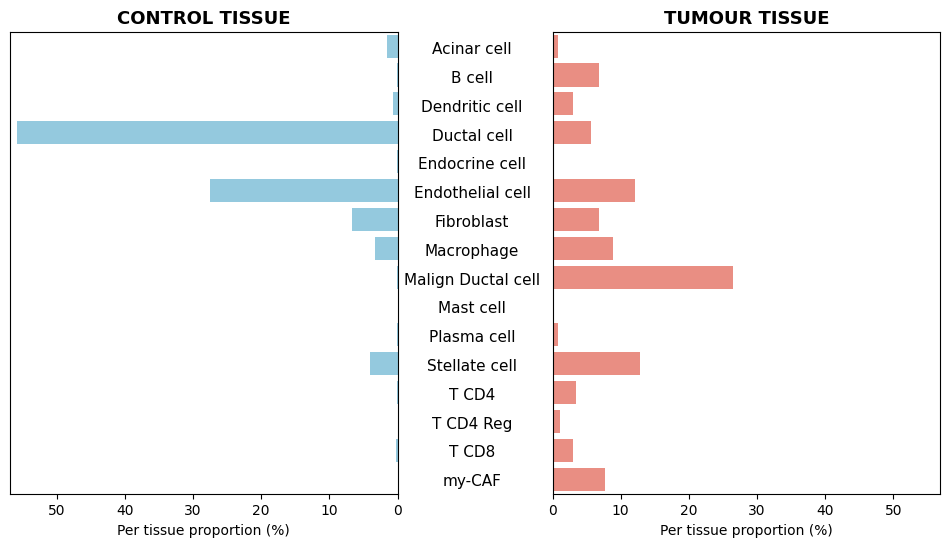

In [5]:
# Initialize the figure
fig, ax = plt.subplots(1, 2, figsize=(12, 6),sharey="row")  

# Create the plots
sns.barplot(data=percent_NT, y="Cell Type", x='Percentage of cells', color="skyblue", ax=ax[0])
sns.barplot(data=percent_T, y="Cell Type", x='Percentage of cells', color="salmon", ax=ax[1])

# Invert x axis of the first subplot
ax[0].invert_xaxis()

# Adjust the space between subplots
plt.subplots_adjust(wspace=0.4)

# Remove y labels and ticks
ax[0].set_yticks([])
ax[0].set_ylabel("")
ax[1].set_ylabel("")

# Set axis names
ax[0].set_xlabel("Per tissue proportion (%)")
ax[1].set_xlabel("Per tissue proportion (%)")

# Agregate the cell labels between the subplots
for i,label in enumerate(percent_NT["Cell Type"].sort_values(ascending=False)):
    fig.text(0.51,0.048*i+0.131 , label, ha='center', va='center', rotation='horizontal', fontsize=11)
    
ax[0].set_title("CONTROL TISSUE", fontsize=13,fontweight=800)
ax[1].set_title("TUMOUR TISSUE", fontsize=13,fontweight=800)

# Calculate the max value tu set the x limit and keep the proportions
max_value = max(percent_NT["Percentage of cells"].tolist()+percent_T["Percentage of cells"].tolist())+1
ax[0].set_xlim(max_value,0)
ax[1].set_xlim(0, max_value)

# Save and show
plt.savefig("./Results/Celltype_frequencies/cell_frequencies_plot.png",bbox_inches="tight")
plt.show()

In [6]:
mac = adata[adata.obs.per_cluster_celltype=="Macrophage",:]

mac

View of AnnData object with n_obs × n_vars = 3687 × 2000
    obs: 'cell_name', 'Sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'doublet', '_scvi_batch', '_scvi_labels', 'leiden', 'cell_type_prediction', 'cell_type_prediction_probability', 'per_cluster_celltype', 'per_cluster_proportion', 'Condition'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'n_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'cell_type_prediction_colors', 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'

c:\Users\valle\anaconda3\envs\scrna_seq\Lib\site-packages\scanpy\tools\_score_genes.py:175: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[score_name] = pd.Series(


c:\Users\valle\anaconda3\envs\scrna_seq\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


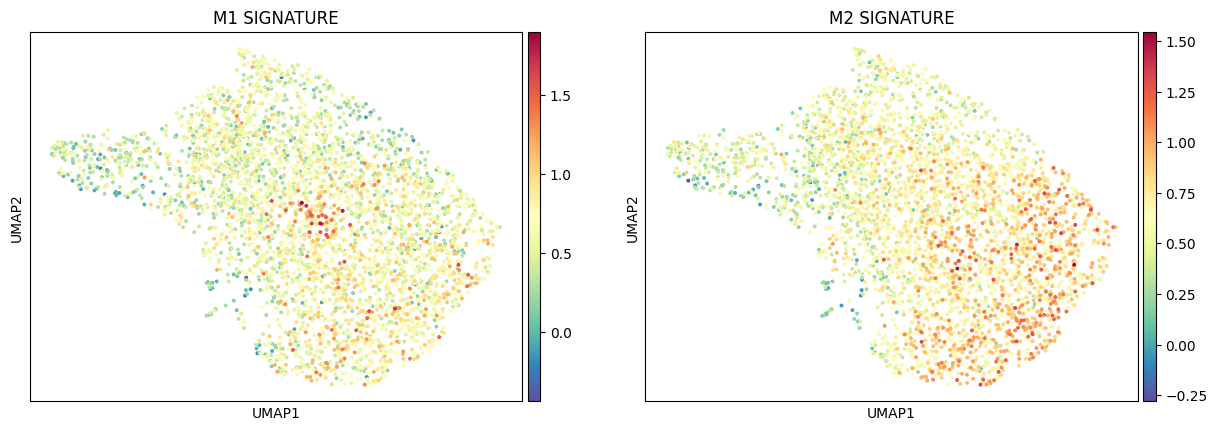

In [7]:
m1_sig = open("./Data/MACROPHAGE_SIGNATURES/M1_SIGNATURE.txt","r").read().split(", ")
m2_sig = open("./Data/MACROPHAGE_SIGNATURES/M2_SIGNATURE.txt","r").read().split(", ")

sc.tl.score_genes(mac,gene_list=m1_sig,score_name="M1 SIGNATURE")
sc.tl.score_genes(mac,gene_list=m2_sig,score_name="M2 SIGNATURE")

sc.pp.neighbors(mac)
sc.tl.umap(mac)

sc.pl.umap(mac,color=["M1 SIGNATURE","M2 SIGNATURE"],cmap="Spectral_r")